In [61]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import functools
from datetime import datetime

In [62]:
ticker = 'QQQ'
support_threshold = -0.03

df = pd.read_csv('data_yahoo_history/'+ticker+'.csv', index_col=0, parse_dates=True)

In [63]:
df['AllTimeHigh'] = df['High' \
                       '' \
                       ''].cummax()
df['CloseChange'] = df['Close'].pct_change()
df['LowChange'] = (df['Low'] / df['Low'].shift(1) - 1).clip(upper=0)
df['LowChangeCum'] = df['LowChange'].rolling(5).apply(lambda w: functools.reduce((lambda x,y: 0 if y == 0 else x + y), w))
df['NewSupport'] = (df['LowChangeCum'] < support_threshold) & (df['LowChangeCum'].shift(-1) == 0)
df['Support'] = np.where(df['NewSupport'],df['Low'],np.NaN)
df['Support'].ffill(inplace=True)

c:\users\horace\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


In [64]:
df.loc['2010':'2020'].tail(30)

,Open,High,Low,Close,Volume,AllTimeHigh,LowChange,LowChangeCum,NewSupport,Support
Date,,,,,,,,,,
2020-05-21,146.774684,146.774684,141.215861,144.269714,805500.0,152.393379,-0.038919,-0.043112,True,141.215861
2020-05-22,145.287678,148.551117,144.968314,147.034164,732300.0,152.393379,0.000000,0.000000,False,141.215861
2020-05-26,147.712783,147.762685,141.415456,141.804672,911900.0,152.393379,-0.024508,-0.024508,False,141.215861
2020-05-27,138.421481,139.499314,134.738888,138.900513,1330900.0,152.393379,-0.047212,-0.071720,True,134.738888
2020-05-28,141.295701,143.012248,139.279753,141.076141,974300.0,152.393379,0.000000,0.000000,False,134.738888
2020-05-29,145.706829,145.706829,139.649010,140.297714,1168600.0,152.393379,0.000000,0.000000,False,134.738888
2020-06-01,140.257786,141.255778,137.223897,139.918472,1006100.0,152.393379,-0.017366,-0.017366,False,134.738888
2020-06-02,139.918468,140.587121,134.090199,135.267822,993600.0,152.393379,-0.022836,-0.040202,False,134.738888
2020-06-03,131.794817,134.100176,129.928577,131.136139,1271300.0,152.393379,-0.031036,-0.071238,True,129.928577


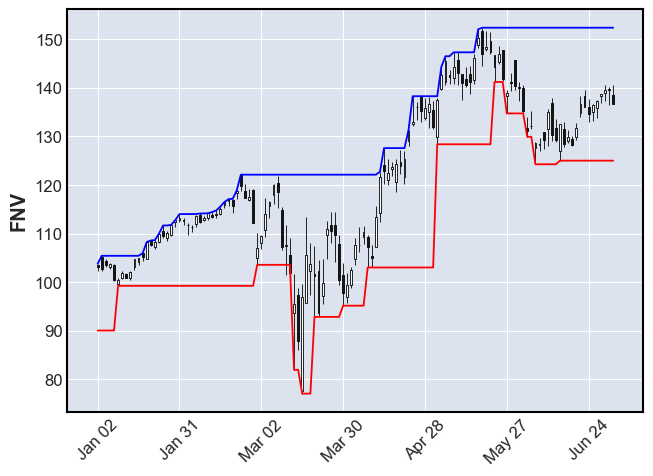

In [65]:
dfplot = df2010 = df.loc['2020']
apdict = [
    mpf.make_addplot(dfplot['AllTimeHigh'], color='b'),
    mpf.make_addplot(dfplot['Support'], color='r'),]
mpf.plot(dfplot, type='candle', ylabel=ticker, addplot=apdict)